Czarna Magia Pythona - metaklasy bez tajemnic
==============
<br>

### *PyLight#8, 25.09.2018* 

<br><br>
Albert Rozmus
<br><br>
email: albiczg@gmail.com / albert.rozmus@codilime.com

# WORK WORK
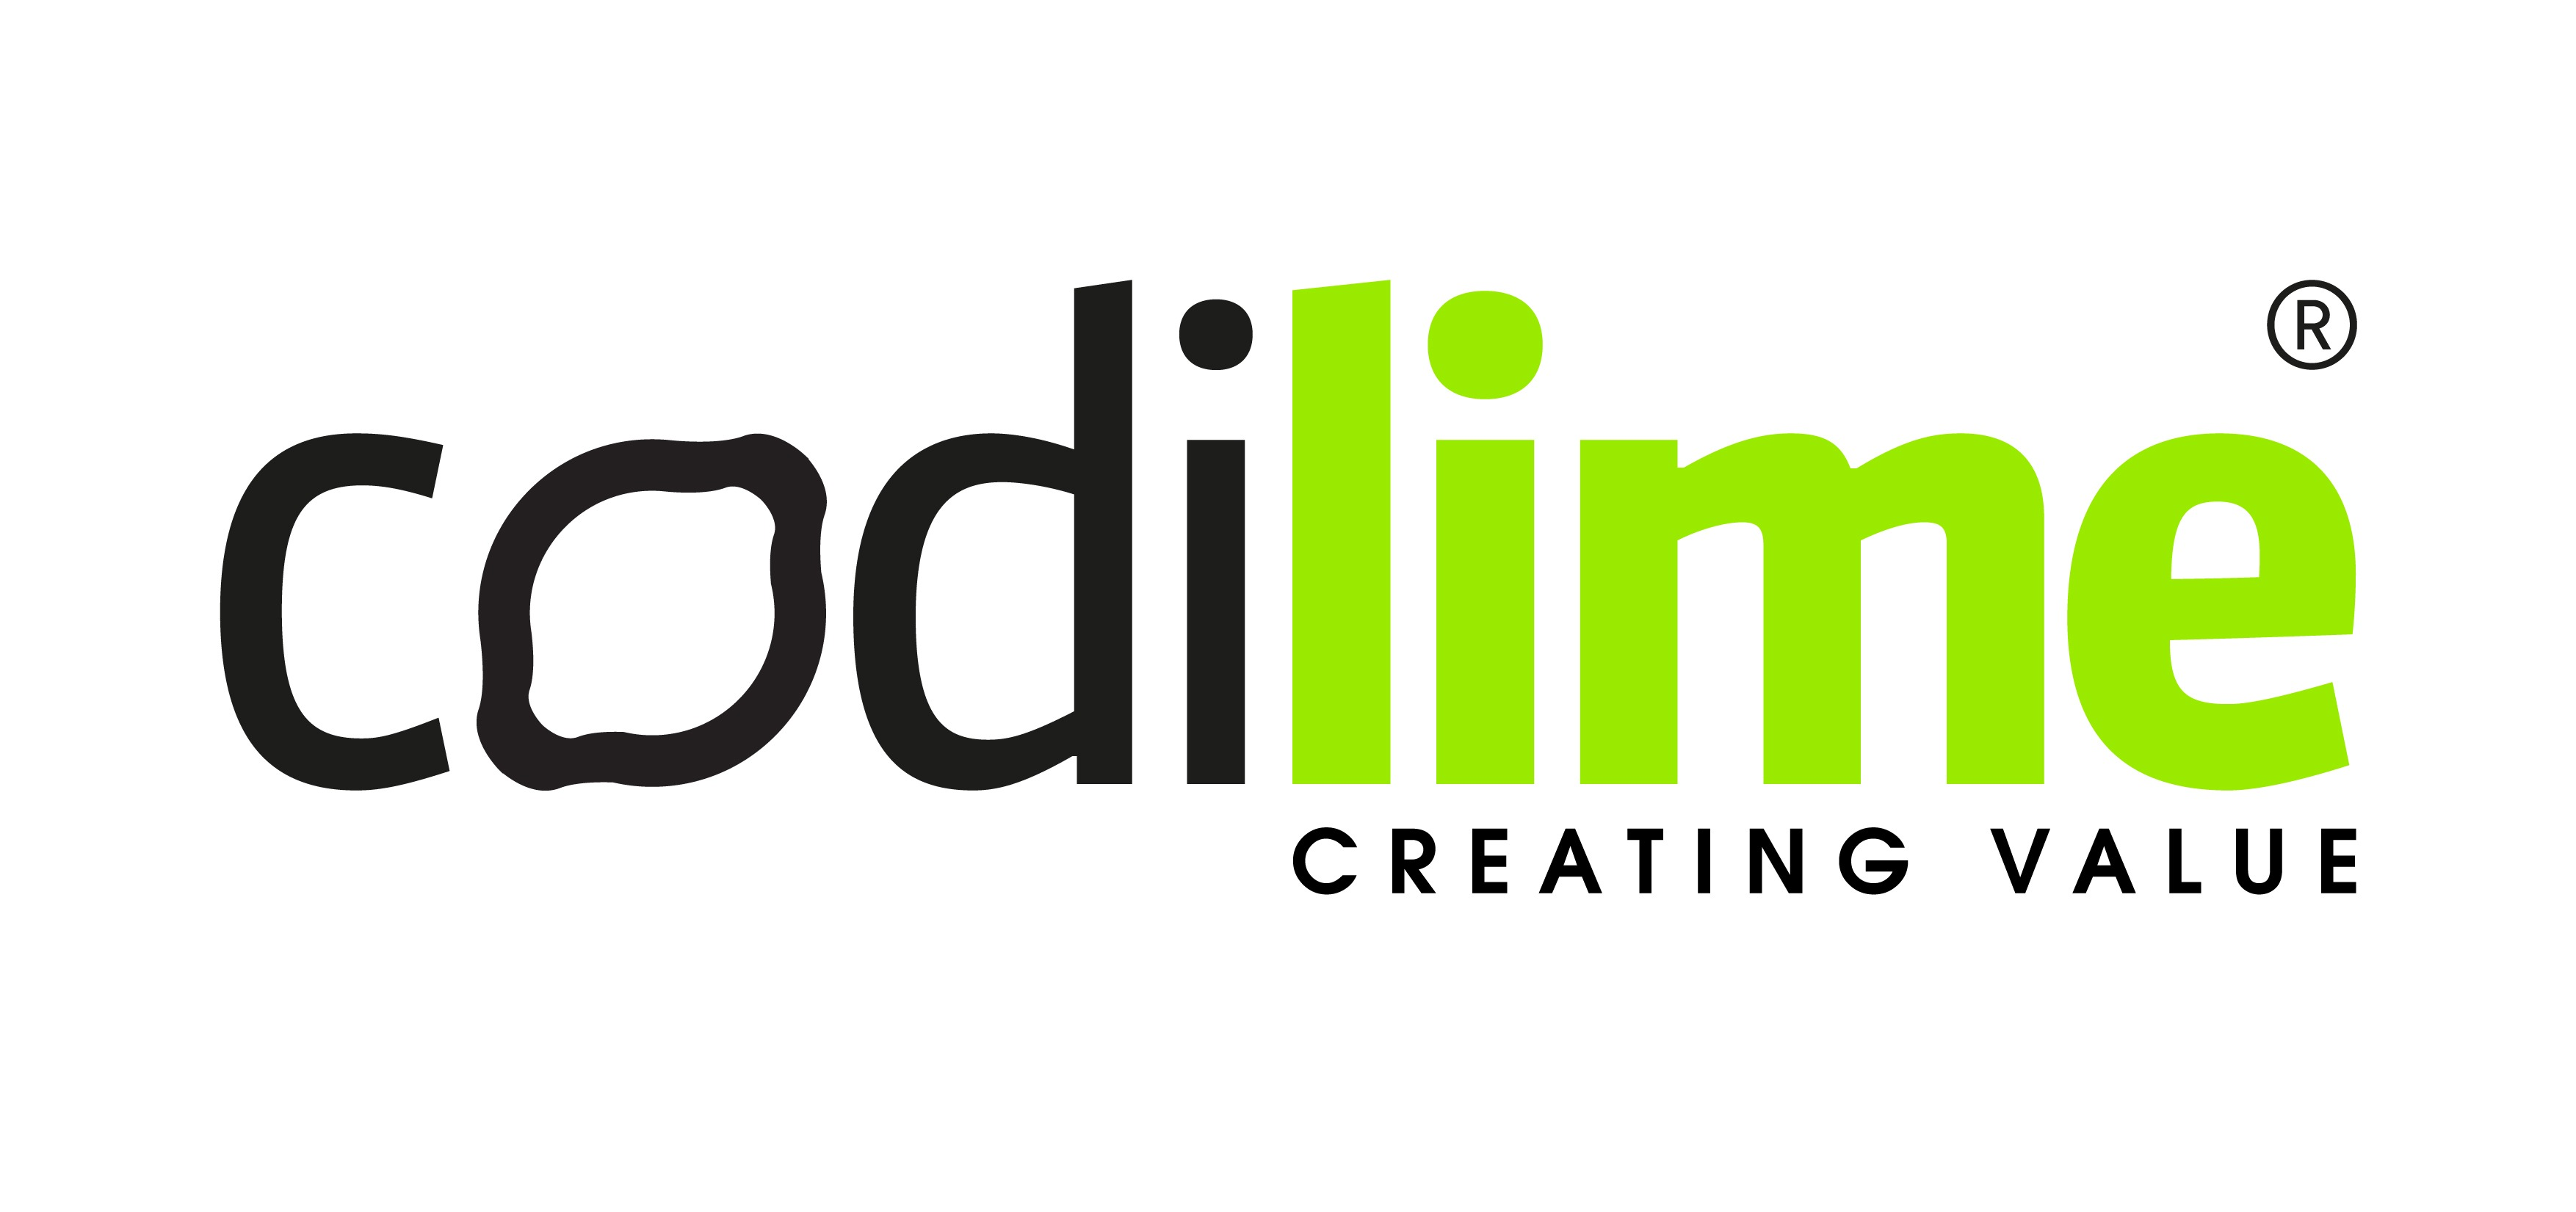

### Work work od ~3lat
<br>

* QA Systemu SDWAN

* Czym dokładnie jest SDWAN to może później...

* Dużo Python'a i sieci komputerowych

# Meta

> **Meta** <br>
> *przedrostek oznaczający ponad, poza lub o czymś w innym kontekście
> (używany w nauce lub w zagadnieniach społecznych)* <br>
> <p style="text-align: right;">Wikipedia</p>

# Coś o metaklasach
<br>



> *Metaclasses are deeper magic than 99% of users should ever worry about. If you wonder whether you need them, you 
> don’t (the people who actually need them know with certainty that they need them, and don’t need an explanation 
> about why).*
> <br> 
> <p style="text-align: right;">Tim Peters</p>

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Czy powininno się ich używać?

# NIE

### Nigdy przenigdy

### Nie rozmawiajmy już o nich

# Dziękuje!
<br>

## Pytania? Kawa?

# Czy powininno się ich używać?

* To zależy...
* Każda nowa konstrukcja języka może być '*zbyt zaawansowana*'
* Nie należy się ich bać
* Należy szerzyć świadomość

# Let's go! :3

### Zacząć najlepiej od prostych idei

In [2]:
class SimplestPossible:
    pass

### Do złożonych

In [3]:
class MetaDebug(type):
    def __init__(cls, name, bases, attr_dict):
        super().__init__(name, bases, attr_dict)
        for key, attr in cls.__dict__.items():
            if not callable(attr):
                continue
            print(f'Modifying {cls.__name__}.{key}-{attr}')
            def make_wrapper(key, attr):
                def wrapper(self, *args, **kwargs):
                    print(f'***START::{cls.__name__}.{key}')
                    attr(self, *args, **kwargs)
                    print(f'***STOP::{cls.__name__}.{key}')
                return wrapper
            setattr(cls, key, make_wrapper(key, attr))

# Proste idee Python'a o których warto wspomnieć
<br>

* Wszystko jest obiektem

* Serio wszystko - funkcje, typy proste (int, float, etc...)

* Nawet klasy i metaklasy nie są święte - wszystko to obiekty 

* Które w związku z tym możemy dokonywać introspekcji i modyfikować

* **I to jest sedno metaprogramowania**

# Różne smaki podejścia meta - dekoratory

In [4]:
def retry(func):
    return func
def run_in_thread(func):
    return func

In [5]:
@retry
def need_to_wait_for_success():
    pass


In [6]:
@property
def need_to_validate_setter():
    pass

In [7]:
@run_in_thread
def blocking_function():
    pass

Wszystko to lukier syntaktyczny, następujące są równoważne:

In [8]:
@run_in_thread
def blocking_function():
    pass
blocking_function()

def another_blocking_function():
    pass
run_in_thread(another_blocking_function)()

# Różne smaki podejścia meta - dekoratory klas

In [9]:
def simple_class_debugger(cls):
    __init__ = getattr(cls, '__init__') # method is object
    def init_wrapper(self, *args, **kwargs):
        print(f'DEBUG::Instantiating {cls.__name__} - {id(self)}')
        __init__(self, *args, **kwargs) # closure
    cls.__init__ = init_wrapper
    return cls
    

In [10]:
@simple_class_debugger
class DebuggingTest:
    pass

In [11]:
c1 = DebuggingTest()
c2 = DebuggingTest()

DEBUG::Instantiating DebuggingTest - 140524758837400
DEBUG::Instantiating DebuggingTest - 140524758839248


# Różne smaki podejścia meta - eval, exec

In [12]:
s = 'hello'
eval(f'print("evaluated {s}")')

evaluated hello


In [13]:
s = 'hello'
exec(f'def dynamic_hello(): print("dynamic function {s}")')
dynamic_hello()

dynamic function hello


* Niby nie jest zalecane przed twórców
* Aaaaale - lookup collections.namedtuple

# Różne smaki podejścia meta - inspect

In [14]:
import inspect

def even_squares(n):
    return [i*i for i in range(n) if i % 2 == 0]

print(even_squares(10))
print(inspect.getsource(even_squares))

[0, 4, 16, 36, 64]
def even_squares(n):
    return [i*i for i in range(n) if i % 2 == 0]



* I dużo dużo więcej - GOTO moduł inspect

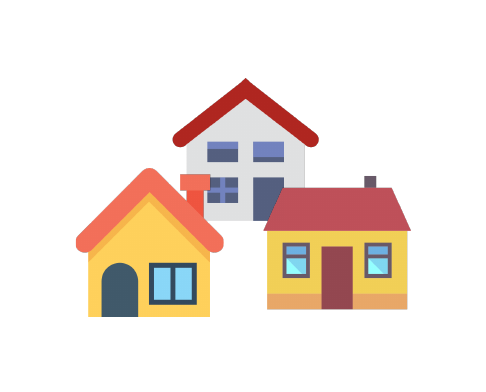

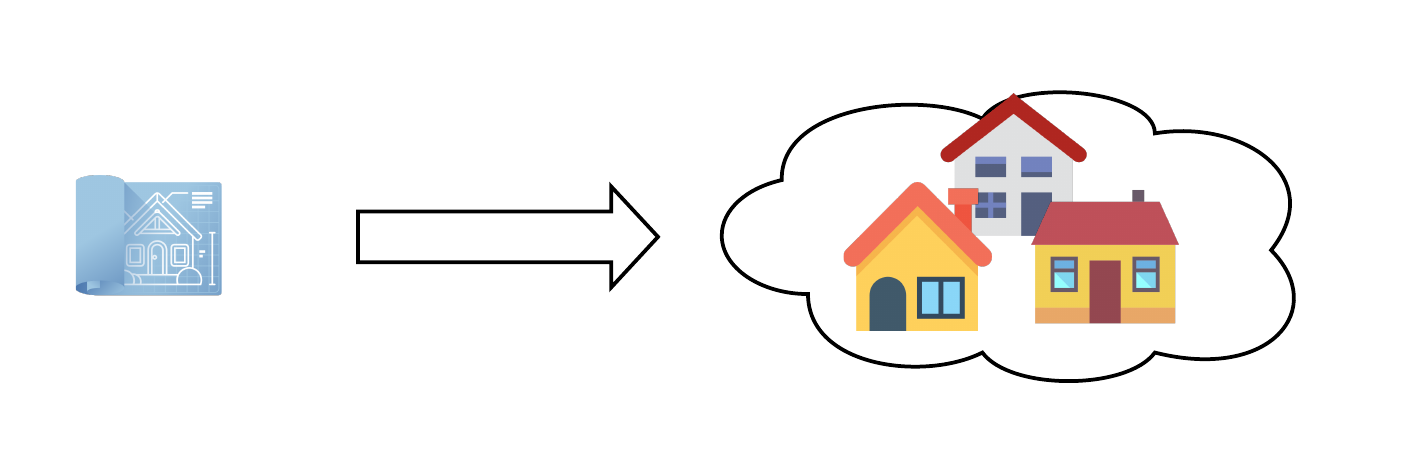

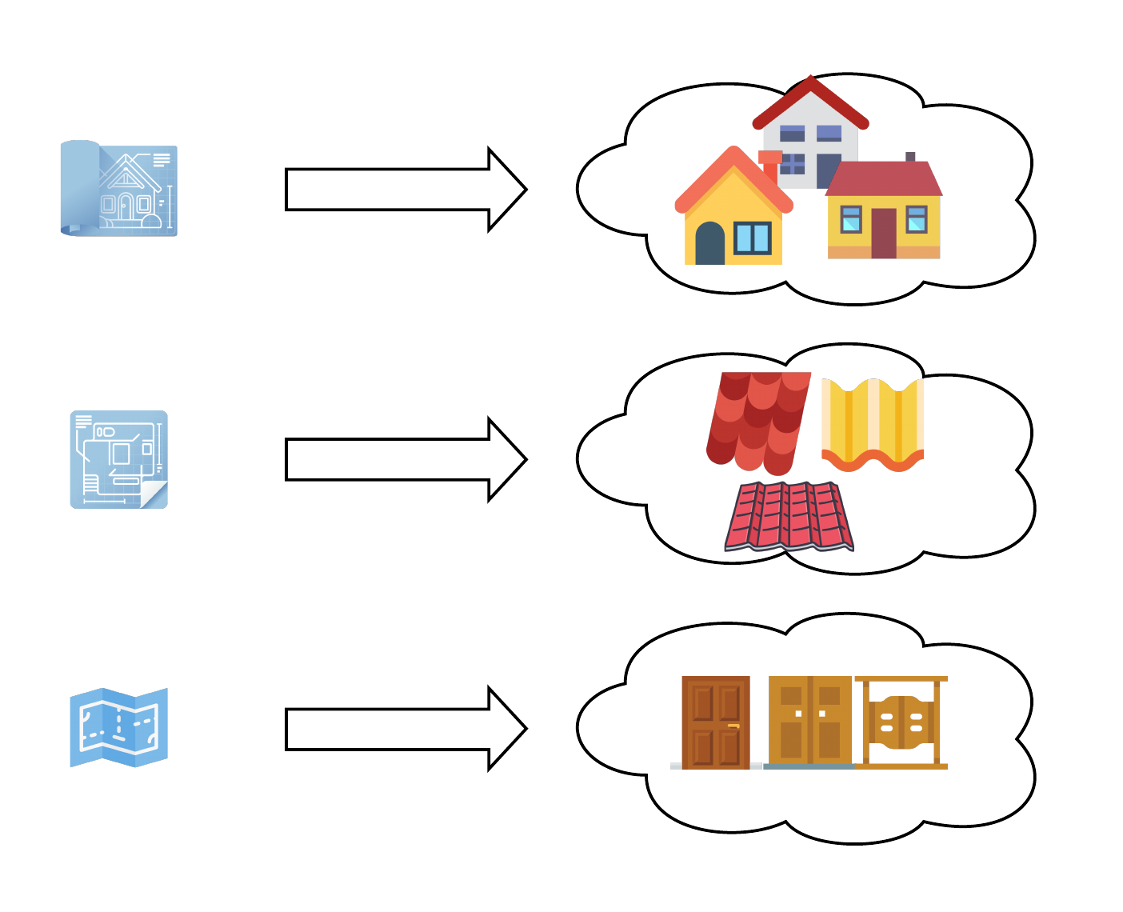

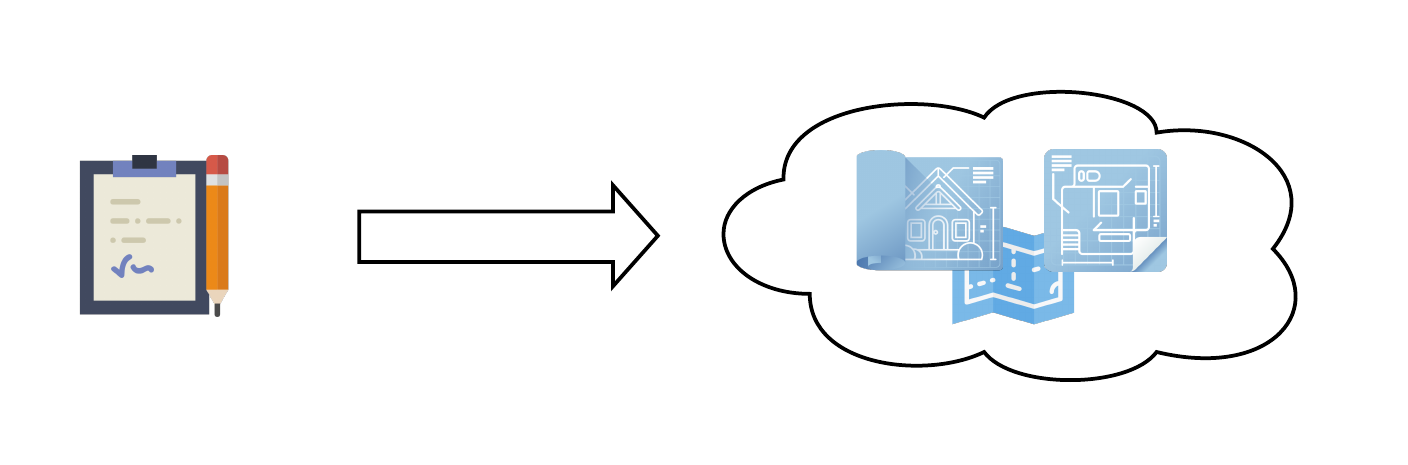

# Poznajmy type
<br>

Type to słowo-klucz w Python'ie.
Morze być wykorzystany do:

1. Sprawdzanie typu obiektu

2. Dynamiczne tworzenie klas

3. Korzeń drzewa instancji

# 1. type jako funkcja do podglądania typu

In [15]:
print(type(7))
print(type(object()))

<class 'int'>
<class 'object'>


In [16]:
print(type(object))

<class 'type'>


In [17]:
print(type(type))

<class 'type'>


# 2. type jako fabryka klas

In [18]:
EmptyClass = type('EmptyClass', (object,), {})

In [19]:
empty_class_obj = EmptyClass()

In [20]:
print(type(empty_class_obj))

<class '__main__.EmptyClass'>


In [21]:
print(dir(empty_class_obj))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']


# 3. type jako drzewo struktury instancji (mindmelt alert)

In [22]:
print(isinstance(int, type))

True


In [23]:
print(isinstance(object, type))

True


Ale! Bonus round:

In [24]:
print(issubclass(type, object))

True


# Czas na kod!
Zacznijmy od prostej klasy

In [25]:
class SampleClass:
    x = 4
    
    def print_id(self):
        print(id(self))

SampleClass().print_id()
print(type(SampleClass))

140524758846040
<class 'type'>


In [26]:
def print_id(self):
    print(id(self))

DynamicSampleClass = type('DynamicSampleClass', (object,), {'x': 4, 'print_id': print_id})
print(type(DynamicSampleClass))
DynamicSampleClass().print_id()

<class 'type'>
140524758846600


# And even more fun ]:->

In [27]:
class SampleMetaclass(type):  # inherits from type!!!!
    def __init__(cls, name, bases, attr_dict):  # cls instead of self - convention
        super().__init__(name, bases, attr_dict)

A teraz troche magii...

In [28]:
OurNewMetaclassedClass = SampleMetaclass('OurNewMetaclassedClass', (object,), {})

our_new_metaclassed_object = OurNewMetaclassedClass()
print(type(our_new_metaclassed_object))
print(type(OurNewMetaclassedClass))

<class '__main__.OurNewMetaclassedClass'>
<class '__main__.SampleMetaclass'>


# Prawdziwy przykład

In [29]:
class MetaDebug(type):
    def __init__(cls, name, bases, attr_dict):
        super().__init__(name, bases, attr_dict)
        for key, attr in cls.__dict__.items():
            if not callable(attr):
                continue
            print(f'Modifying {cls.__name__}.{key}-{attr}')
            def make_wrapper(key, attr):
                def wrapper(self, *args, **kwargs):
                    print(f'***START::{cls.__name__}.{key}')
                    attr(self, *args, **kwargs)
                    print(f'***STOP::{cls.__name__}.{key}')
                return wrapper
            setattr(cls, key, make_wrapper(key, attr))

In [30]:
class MetaDebuggedClass(metaclass=MetaDebug):
    def print_id(self):
        print(id(self))

Modifying MetaDebuggedClass.print_id-<function MetaDebuggedClass.print_id at 0x7fce78563b70>


In [31]:
mdc = MetaDebuggedClass()
mdc.print_id()

***START::MetaDebuggedClass.print_id
140524758844808
***STOP::MetaDebuggedClass.print_id


# Porównanie metaklasa vs zwykła biedna szara klasa

In [32]:
class ClassOrdinary(object):
    def __init__(self, *args, **kwargs):
        ...

In [33]:
class ClassMeta(type):
    def __init__(cls, name, bases, attr_dict):
        ...

# Podsumowanie

**Zalety**

* Elegancja kodu

* Zrozumienie zasady działania poprawia zrozumienie Pythona

**Wady**

* Potencjalnie utrudnia zrozumienie kodu

* Debugowanie dostarcza wielu emocji :)

# Dzięki!!
<br>

## No i teraz już serio pytania

# Czytanki
<br>

* [Dobre wyjaśnienie, wiele przykładów](https://realpython.com/python-metaclasses/)
* [Python docs](https://docs.python.org/3.6/reference/datamodel.html#metaclasses)
* [Bardzo dobry wpis na StackOverflow](https://stackoverflow.com/a/6581949)
* [Książka godna polecenia - Zaawansowany Python](http://images.nexto.pl/upload/virtualo/promise/f64d5558009e1808ed0f167486aeb334fa3b2ebe/free/f64d5558009e1808ed0f167486aeb334fa3b2ebe.pdf)